In [17]:
# 1- Importar el archivo csv y extraer las variables Total_Score, Study_hours_per_Week y Attendance(%)
# 2- Limpiar datos aplicando al menos un algoritmo de deteccion de outliers
# 3- Normalizar/estandarizar datos
# 4- Agrupamiento K-means
# 5- Etiquetado y descripcion de clusters 

In [18]:
import pandas as pd
datos = pd.read_csv("datos.csv")

datosR= datos[['Total_Score','Study_Hours_per_Week', 'Attendance (%)' ]]
print(len(datosR))

5000


In [ ]:
# Limpieza de datos utilizando el algoritmo LOF (Local Outlier Factor)
from sklearn.neighbors import LocalOutlierFactor

# Manejar valores faltantes antes de aplicar LOF
datosR_cleaned = datosR.dropna()  # Eliminar filas con valores faltantes

# Aplicar LOF para detectar outliers
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
outlier_flags = lof.fit_predict(datosR_cleaned)

# Filtrar los datos para eliminar los outliers
datosR_sin_outliers = datosR_cleaned[outlier_flags == 1]

# Mostrar los datos después de eliminar los outliers
print("Datos después de eliminar outliers:")
print(datosR_sin_outliers.head())

# Se limpiaron todos aquellos datos que generaban ruido en base a su LOF con 20 vecinos y un coeficiente de 0.05 , para esto antes se eliminaron los NaN ya que estos hacen imposible los calculos

Datos después de eliminar outliers:
   Total_Score  Study_Hours_per_Week  Attendance (%)
0        56.09                   6.2           52.29
1        50.64                  19.0           97.27
2        70.30                  20.7           57.19
3        61.63                  24.8           95.15
4        66.13                  15.4           54.18


In [ ]:
#Normalizacion de los datos:

from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Normalización (MinMaxScaler)
scaler_minmax = MinMaxScaler()
datos_normalizados = scaler_minmax.fit_transform(datosR_sin_outliers)

# Convertir el resultado de la normalización a DataFrame
datos_normalizados_df = pd.DataFrame(datos_normalizados, columns=['Total_Score', 'Study_Hours_per_Week', 'Attendance (%)'])

# Estandarización (StandardScaler)
scaler_standard = StandardScaler()
datos_estandarizados = scaler_standard.fit_transform(datosR_sin_outliers)

# Convertir el resultado de la estandarización a DataFrame
datos_estandarizados_df = pd.DataFrame(datos_estandarizados, columns=['Total_Score', 'Study_Hours_per_Week', 'Attendance (%)'])
# Desplazar los valores para que no existan negativos
for column in ['Total_Score', 'Study_Hours_per_Week', 'Attendance (%)']:
    min_value = datos_estandarizados_df[column].min()
    if min_value < 0:
        datos_estandarizados_df[column] += abs(min_value)

# Mostrar resultados (Los primeros 4 datos)
print("Datos Normalizados:")
print(datos_normalizados_df.head())

print("\nDatos Estandarizados:")
print(datos_estandarizados_df.head())

#Este proceso es muy imporante para que no existan problemas de escala entre los valores, sobre todo porque estamos trabajando con porcentajes y luego horas semanales o puntaje total.
#El MinMaxScaler es el que se utiliza para normalizar los datos entre 0 y 1, mientras que el StandardScaler estandariza los datos para que tengan media 0 y desviacion estandar 1.
#Para normalizar y estandarizar  usamos MinMaxScaler y StandardScaler de la libreria sklearn.preprocessing
#Solo necesitamos los datos estandarizados O normalizados esto lo veremos mas adelante con cual nos quedamos


Datos Normalizados:
   Total_Score  Study_Hours_per_Week  Attendance (%)
0     0.121473                 0.048        0.045609
1     0.012407                 0.560        0.945389
2     0.405844                 0.628        0.143629
3     0.232339                 0.792        0.902981
4     0.322393                 0.416        0.083417

Datos Estandarizados:
   Total_Score  Study_Hours_per_Week  Attendance (%)
0     0.430191              0.169497        0.160640
1     0.043940              1.977460        3.329749
2     1.437276              2.217580        0.505874
3     0.822819              2.796693        3.180383
4     1.141741              1.468970        0.293801


In [ ]:
# Implementación de K-means utilizando datos normalizados y estandarizados
from sklearn.cluster import KMeans

# Número de clusters
K = 3 # Este valor lo elegimos arbitrariamente en un inicio, pero al usar el metodo del codo determinamos el optimo en 3

# Aplicar K-means a los datos normalizados 
kmeans_normalizados = KMeans(n_clusters=K, random_state=42, n_init=10)
kmeans_normalizados.fit(datos_normalizados_df)
datos_normalizados_df['Cluster'] = kmeans_normalizados.labels_

# Aplicar K-means a los datos estandarizados 
kmeans_estandarizados = KMeans(n_clusters=K, random_state=42, n_init=10)
kmeans_estandarizados.fit(datos_estandarizados_df)
datos_estandarizados_df['Cluster'] = kmeans_estandarizados.labels_

# Mostrar resultados de los clusters para datos normalizados
print("Clusters para datos normalizados:")
print(datos_normalizados_df.head())

# Mostrar resultados de los clusters para datos estandarizados
print("\nClusters para datos estandarizados:")
print(datos_estandarizados_df.head())

Clusters para datos normalizados:
   Total_Score  Study_Hours_per_Week  Attendance (%)  Cluster
0     0.121473                 0.048        0.045609        1
1     0.012407                 0.560        0.945389        2
2     0.405844                 0.628        0.143629        1
3     0.232339                 0.792        0.902981        2
4     0.322393                 0.416        0.083417        1

Clusters para datos estandarizados:
   Total_Score  Study_Hours_per_Week  Attendance (%)  Cluster
0     0.430191              0.169497        0.160640        1
1     0.043940              1.977460        3.329749        2
2     1.437276              2.217580        0.505874        1
3     0.822819              2.796693        3.180383        2
4     1.141741              1.468970        0.293801        1


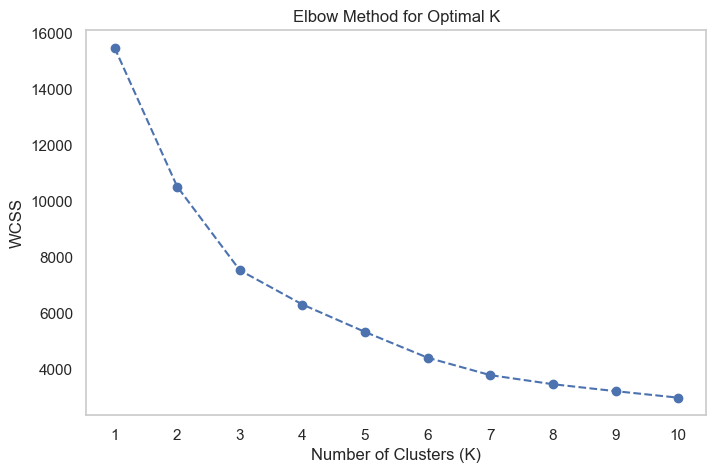

In [28]:
# Metodo del Codo para determinar el número óptimo de clusters
import matplotlib.pyplot as plt

wcss = []  # Within-Cluster Sum of Squares
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(datos_estandarizados_df)
    wcss.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid()
plt.show()

In [29]:
# Visualización 3D de los clusters
import plotly.express as px

# Crear gráfico 3D para datos normalizados
fig_normalizados = px.scatter_3d(
    datos_normalizados_df,
    x='Total_Score',
    y='Study_Hours_per_Week',
    z='Attendance (%)',
    color='Cluster',
    title='Clusters en Datos Normalizados',
    labels={'Total_Score': 'Total Score', 'Study_Hours_per Week': 'Study Hours per Week', 'Attendance (%)': 'Attendance (%)'},
    color_continuous_scale='Viridis'
)
fig_normalizados.show()

# Crear gráfico 3D para datos estandarizados
fig_estandarizados = px.scatter_3d(
    datos_estandarizados_df,
    x='Total_Score',
    y='Study_Hours_per_Week',
    z='Attendance (%)',
    color='Cluster',
    title='Clusters en Datos Estandarizados',
    labels={'Total_Score': 'Total Score', 'Study_Hours_per Week': 'Study Hours per Week', 'Attendance (%)': 'Attendance (%)'},
    color_continuous_scale='Viridis'
)
fig_estandarizados.show()

Haciendo la comparacion de los gráficos, decidimos quedarnos con los datos estandarizados, pero en realidad no hay mucha diferencia entre los resultados, por lo que cualquiera de las 2 sirve.
Detectamos 3 clusters, 0, 1 y 2, representados con morado, celeste y amarillo respectivamente. 
-Cluster 0: Estudiantes con pocas horas de estudio semanales
-Cluster 1: Estudiantes con poca asistencia
-Cluster 2: Estudiantes con alta asistencia y altas horas de estudio
Todo esta asignacion de etiquetas se hizo en base a los resultados graficos y su interpretacion en el contexto del problema y sus variables